In [1]:
#install ipykernel first in venv

In [53]:
from PIL import Image
import numpy as np
import torch
# import cv2
import io
import os

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


def load_model():

    custom_yolov7_model = torch.hub.load(
        "WongKinYiu/yolov7", 'custom', './best.pt')

    return custom_yolov7_model


def get_prediction(img_bytes, model):

    img = Image.open(io.BytesIO(img_bytes))
    results = model(img, size=640)

    return results


def analyse_image(image, model):

    if image is not None:

        img = Image.open(image)
        bytes_data = image.getvalue()
        img_bytes = np.asarray(bytearray(bytes_data), dtype=np.uint8)
        result = get_prediction(img_bytes, model)
        result.render()

        for img in result.imgs:
            RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im_arr = cv2.imencode('.jpg', RGB_img)[1]
            #st.image(im_arr.tobytes())

        result_list = list((result.pandas().xyxy[0])["name"])

    else:
        # st.write("no asl letters were detected!")
        result_list = []

    return result_list


model = load_model()
f = open('modpic.jpg', 'rb')
bytes_data = f.read()
#img_bytes = np.asarray(bytearray(bytes_data), dtype=np.uint8)

#print("Done open.")
res = get_prediction(bytes_data, model)
# create a new copy for result's img so img can be writable for 'hidden' cv2.rectangle function; check flags: [np.array].flags
res.imgs[0] = res.imgs[0].copy()
# https://github.com/WongKinYiu/yolov7/blob/main/models/common.py
res.render()

print(res)

f.close()

Using cache found in /Users/huy/.cache/torch/hub/WongKinYiu_yolov7_main

                 from  n    params  module                                  arguments                     
  0                -1  1       928  models.common.Conv                      [3, 32, 3, 1]                 
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  5                -2  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  6                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  7                -1  1     36992  models.common.Conv                 

Adding autoShape... 


In [13]:
res.imgs[0].shape

(1920, 1920, 3)

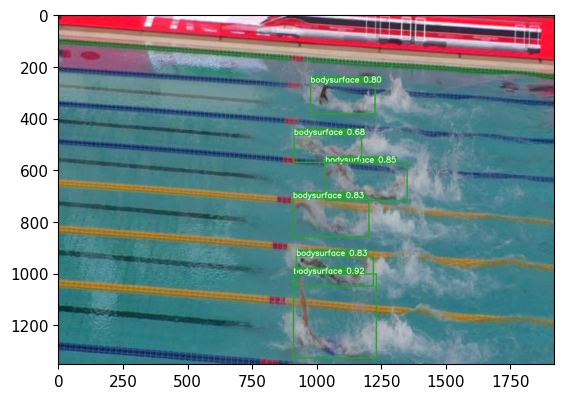

In [54]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(res.imgs[0])#, interpolation='nearest')
#plt.imsave("res.jpg", res.imgs[0])
#plt.show()

In [21]:
img_bytes.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False